In [84]:
"""
Comprehensive Examples for All Asset Classes
"""
import numpy as np
from datetime import datetime
from assetpricing.utils.date_handling import day_count
from assetpricing.fixed_income.bond_pricing import (
    zero_coupon_pv,
    fixed_coupon_bond_pv,
    calculate_ytm
)
from assetpricing.fixed_income.yield_curves import YieldCurveBootstrapper
from assetpricing.fixed_income.risk_measures import (
    macaulay_duration,
    modified_duration,
    convexity
)
from assetpricing.derivatives.options.black_scholes import black_scholes_price
from assetpricing.derivatives.options.binomial import BinomialTree
from assetpricing.derivatives.options.monte_carlo import MonteCarloPricer
from assetpricing.interest_rate.vasicek_short_rate_models import VasicekModel
from assetpricing.interest_rate.swaps import InterestRateSwap
from assetpricing.foreign_exchange.fx_forwards import fx_forward_rate
from assetpricing.derivatives.volatility_models import (
    implied_volatility,
    plot_volatility_smile,
    plot_volatility_surface,
    plot_volatility_term_structure
)
from assetpricing.derivatives.futures import CostOfCarry
from assetpricing.credit.credit_risk import CreditDefaultSwap
from assetpricing.derivatives.volatility_models import implied_volatility
from assetpricing.foreign_exchange.fx_options import (
    garman_kohlhagen,
    fx_delta,
    fx_gamma,
    fx_vega,
    fx_theta,
    fx_rho,
    plot_sensitivity,
    plot_volatility_surface
)

ImportError: cannot import name 'plot_sensitivity' from 'assetpricing.foreign_exchange.fx_options' (c:\Users\10037\Desktop\assetpricing\foreign_exchange\fx_options.py)

# Fixed Income

### Zero coupon bond example

In [64]:
zc_price = zero_coupon_pv(
    face_value=100,          # Par value at maturity ($)
    time_to_maturity=2,      # Years until maturity
    ytm=0.05,                # Annual yield-to-maturity (5%)
    compounding_freq=0       # Compounding: 0=continuous, 1=annual, 2=semi-annual
)
print(f"Zero Coupon Bond PV: ${zc_price:.2f}")

Zero Coupon Bond PV: $90.48


### Fixed coupon bond example

In [65]:
times = [0.5, 1.0, 1.5, 2.0]  # Semi-annual payment times
bond_price = fixed_coupon_bond_pv(
    coupon_rate=0.05,        # Annual coupon rate (5%)
    face_value=100,          # Par value
    times=times,             # Cash flow timings (years)
    ytm=0.05,                # Yield to maturity
    compounding_freq=2       # 2:Semi-annual compounding
)
print(f"Fixed Coupon Bond PV: ${bond_price:.2f}")

Fixed Coupon Bond PV: $100.00


### YTM calculation

In [66]:
ytm = calculate_ytm(
    price=95,                # Current market price
    face_value=100,          # Par value
    coupon_rate=0.05,        # Annual coupon rate
    times=times,             # Cash flow timings
    compounding_freq=2,      # Semi-annual compounding
    guess=0.05               # Initial guess for solver
)
print(f"Calculated YTM: {ytm:.2%}")

Calculated YTM: 7.75%


### Yield Curve Bootstrapping

In [67]:
instruments = [
    (0.25, 0.0175),  # 3M
    (0.5, 0.0190),   # 6M
    (1.0, 0.0215),   # 1Y
    (2.0, 0.0230),   # 2Y
    (3.0, 0.0245),   # 3Y
    (5.0, 0.0260)    # 5Y
]

# %%
# 2. Bootstrap zero rates
yc = YieldCurveBootstrapper(instruments)
zero_rates = yc.bootstrap()

print("Bootstrapped Zero Rates:")
for t, r in sorted(zero_rates.items()):
    print(f"{t:>4} year: {r:.4f} ({r:.2%})")

Bootstrapped Zero Rates:
0.25 year: 0.0694 (6.94%)
 0.5 year: 0.0753 (7.53%)
 1.0 year: 0.0642 (6.42%)
 2.0 year: 0.0461 (4.61%)
 3.0 year: 0.0411 (4.11%)
 5.0 year: 0.0318 (3.18%)


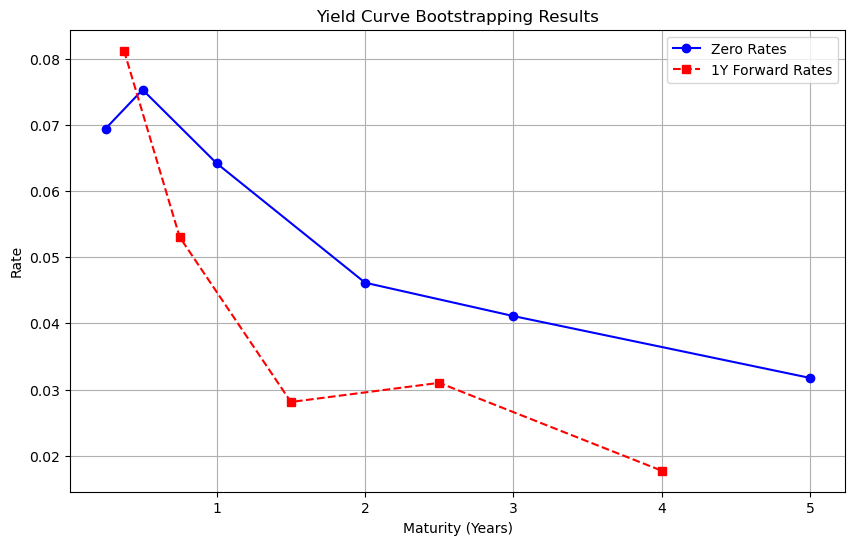

In [ ]:
yc.plot_curve()

In [69]:
# Calculate 2Y1Y forward rate
forward_2y1y = yc.forward_rate(2.0, 3.0)
print(f"2Y1Y Forward Rate: {forward_2y1y:.4f} ({forward_2y1y:.2%})")

# Calculate 1Y2Y forward rate
forward_1y2y = yc.forward_rate(1.0, 3.0)
print(f"1Y2Y Forward Rate: {forward_1y2y:.4f} ({forward_1y2y:.2%})")

2Y1Y Forward Rate: 0.0310 (3.10%)
1Y2Y Forward Rate: 0.0296 (2.96%)


### Duration & Convexity

In [70]:
from assetpricing.fixed_income.risk_measures import macaulay_duration, modified_duration, convexity

cash_flows = [2.5, 2.5, 2.5, 102.5]  # Semi-annual payments
mac_dur = macaulay_duration(
    cash_flows=cash_flows,
    times=times,
    ytm=0.05,
    compounding_freq=2
)
mod_dur = modified_duration(mac_dur, 0.05, 2)
conv = convexity(cash_flows, times, 0.05, 2)

print(f"Macaulay Duration: {mac_dur:.2f} yrs")
print(f"Modified Duration: {mod_dur:.2f}")
print(f"Convexity: {conv:.2f}")


Macaulay Duration: 1.93 yrs
Modified Duration: 1.88
Convexity: 4.53


# Futures

### Basic Future Pricing

In [71]:
# Input parameters
spot = 100.0            # Current spot price ($)
r = 0.05                # Annual risk-free rate (5%)
T = 0.25                # Time to maturity (3 months)

In [72]:
basic_future = CostOfCarry.fair_value(
    spot_price=spot,
    risk_free_rate=r,
    time_to_maturity=T
)
print(f"Basic Futures Price: ${basic_future:.2f}")

Basic Futures Price: $101.26


### Commodity Futures with Storage Costs

In [73]:
storage_cost = 0.02     # 2% of spot price annually
convenience_yield = 0.01 # 1% annual benefit

commodity_future = CostOfCarry.fair_value(
    spot_price=1500,     # Gold spot price
    risk_free_rate=0.04,
    time_to_maturity=0.5,  # 6 months
    storage_cost=storage_cost,
    convenience_yield=convenience_yield
)
print(f"Gold Futures (6M) with Storage: ${commodity_future:.2f}")

Gold Futures (6M) with Storage: $1537.97


### Equity Index Futures with Dividends

In [74]:
div_yield = 0.03        # 3% annual dividend yield

equity_future = CostOfCarry.fair_value(
    spot_price=5000,     # S&P 500 index level
    risk_free_rate=0.05,
    time_to_maturity=0.25,  # 3 months
    dividend_yield=div_yield
)
print(f"Equity Index Futures: ${equity_future:.2f}")

Equity Index Futures: $5025.06


### Calculating Implied Convenience Yield

In [75]:
implied_cy = CostOfCarry.implied_convenience_yield(
    futures_price=1550,
    spot_price=1500,
    risk_free_rate=0.04,
    time_to_maturity=0.5,
    storage_cost=0.02  # Now properly included
)
print(f"Implied Convenience Yield: {implied_cy:.2%}")

Implied Convenience Yield: -0.56%


# Options

### Black-Scholes Option Pricing

In [76]:
bs_price = black_scholes_price(
    S=100,       # Spot price
    K=105,       # Strike price
    T=1,         # Time to expiration (years)
    r=0.05,      # Risk-free rate
    sigma=0.2,   # Volatility
    option_type='call'
)
print(f"BS Call Price: ${bs_price:.2f}")

BS Call Price: $8.02


### Binomial Tree (American Option)

In [77]:
binomial_price = BinomialTree(
    S=100,        # Spot price
    K=100,        # Strike price
    T=1,          # Time to expiration
    r=0.05,       # Risk-free rate
    sigma=0.2,    # Volatility
    steps=100,    # Number of tree steps
    option_type='put',
    american=True  # American exercise
).price()
print(f"Binomial American Put Price: ${binomial_price:.2f}")

Binomial American Put Price: $6.08


### Monte Carlo

In [ ]:
mc_price = MonteCarloPricer(
    S=100,            # Spot price
    K=102,            # Strike price
    T=1,              # Time to expiration
    r=0.05,           # Risk-free rate
    sigma=0.2,        # Volatility
    n_simulations=100000,  # Number of paths
    n_steps=100       # Path resolution
).asian_option()
print(f"Asian Call Price: ${mc_price:.2f}")

Asian Call Price: $4.73


### Stochastic Volatility Pricing Example


In [ ]:
# Basic parameters
params = {
    'S': 150.0,     # Spot price
    'K': 155.0,     # Strike price
    'T': 0.25,      # 3 months
    'r': 0.04,      # Risk-free rate
    'price': 7.20,  # Market price
    'option_type': 'call'
}

iv = implied_volatility(**params)
print(f"Basic Implied Volatility: {iv:.2%}")


TypeError: implied_volatility() got an unexpected keyword argument 'r'

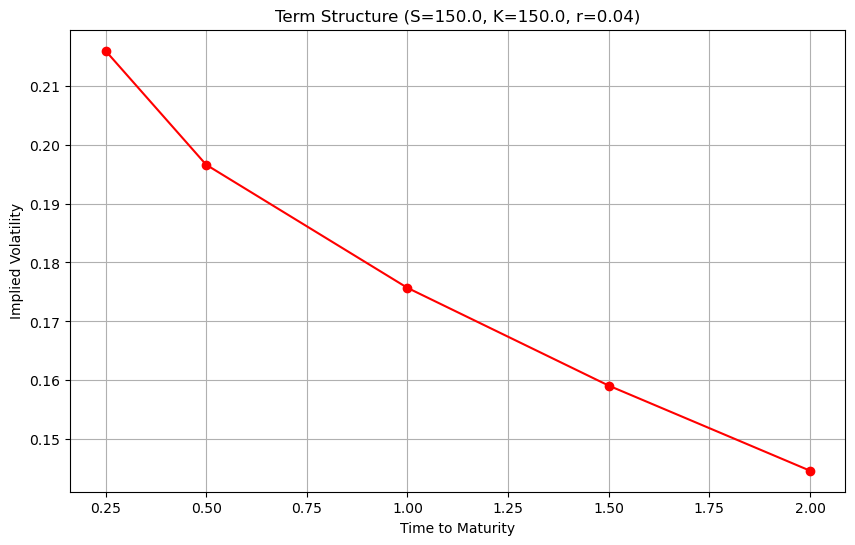

In [50]:
#Term Structure Analysis
# Fixed strike across multiple maturities

# %%
# Term structure parameters
maturities_ts = np.array([0.25, 0.5, 1.0, 1.5, 2.0])
prices_ts = np.array([7.2, 9.8, 13.5, 16.2, 18.4])  # ATM prices

plot_volatility_term_structure(
    S=150.0,
    r=0.04,
    K=150.0,  # ATM strike
    maturities=maturities_ts,
    prices=prices_ts,
    option_type='call'
)

# Interest Rate Models

### Vasicek Model Simulation

In [51]:
vasicek_rates = VasicekModel(
    a=0.1,     # Mean reversion speed
    b=0.05,    # Long-term mean rate
    sigma=0.02,# Volatility
    r0=0.03    # Initial rate
).simulate(T=1, steps=100, n_paths=5)
print("Vasicek Rate Paths:\n", vasicek_rates[:, 0])

Vasicek Rate Paths:
 [0.03       0.02954631 0.03088505 0.02958314 0.03053379 0.03096013
 0.03031212 0.03112042 0.03080021 0.0302712  0.02787788 0.02566356
 0.02475205 0.02441683 0.02357224 0.02249838 0.02169773 0.02229615
 0.01873429 0.01859966 0.0190599  0.01631381 0.01921455 0.01888258
 0.01812963 0.02016197 0.0215704  0.02495995 0.02333678 0.0210314
 0.01964454 0.01714857 0.01965435 0.01862281 0.01847575 0.01942336
 0.01951152 0.02144719 0.02284497 0.02041526 0.01807779 0.0168319
 0.01802194 0.02046788 0.02161223 0.02750545 0.02732465 0.02678811
 0.02615069 0.03218107 0.03195014 0.0332282  0.03362243 0.03499925
 0.0361024  0.0371826  0.03375848 0.03301365 0.03239159 0.03115488
 0.03176839 0.03601247 0.03698409 0.03881506 0.03811605 0.03944139
 0.03926806 0.03834589 0.03701874 0.0413124  0.04357925 0.03974279
 0.03909158 0.03693176 0.03614664 0.03382622 0.03375731 0.03548561
 0.03544921 0.03851494 0.03845505 0.04015187 0.04653842 0.04537384
 0.04679719 0.04552131 0.04364373 0.0424798

### Vasicek Simulation and plotting

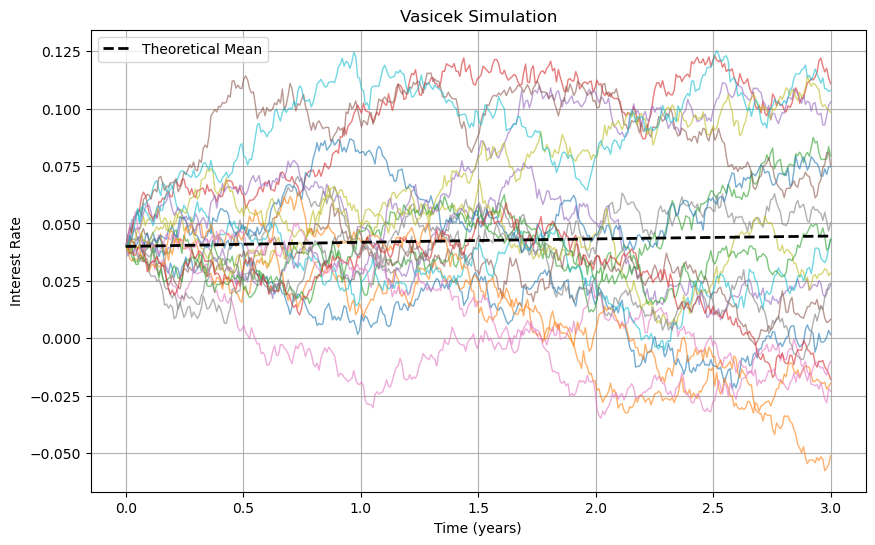

In [52]:
# Simulation and plotting
model = VasicekModel(a=0.2, b=0.05, sigma=0.03, r0=0.04)
rates = model.simulate(T=3, steps=365, n_paths=20)  # Daily simulation for 3 years
model.plot_simulation(rates, T=3, title="Vasicek Simulation")

### Swap Pricing

In [53]:
swap = InterestRateSwap(
    notional=1_000_000,  # Principal amount
    fixed_rate=0.03,     # Fixed leg rate
    tenor=5,             # Swap duration (years)
    day_count='30/360'   # Day count convention
)
# Simplified discount factors
swap_rate = swap.swap_rate(
    discount_factors={5: 0.85},  # {year: discount_factor}
    floating_leg_pv=1_000_000 * 0.025 * 5 * 0.85
)
print(f"Fair Swap Rate: {swap_rate:.2%}")

Fair Swap Rate: 2.50%


# FX 

### FX Option Pricing

In [54]:
from assetpricing.foreign_exchange.fx_options import garman_kohlhagen
# ### 1. Basic Option Pricing
# Parameters:
S = 1.1500   # Spot EUR/USD
K = 1.1600    # Strike price
T = 0.5       # 6 months to expiration
rd = 0.025    # USD rate (domestic)
rf = 0.015    # EUR rate (foreign)
sigma = 0.095 # Implied volatility

# Calculate prices
call_price = garman_kohlhagen(S, K, T, rd, rf, sigma, 'call')
put_price = garman_kohlhagen(S, K, T, rd, rf, sigma, 'put')

print(f"EUR Call/USD Put Price: {call_price:.4f} USD per EUR")
print(f"EUR Put/USD Call Price: {put_price:.4f} USD per EUR")


EUR Call/USD Put Price: 0.0286 USD per EUR
EUR Put/USD Call Price: 0.0328 USD per EUR


In [55]:
# ### 2. Greeks Calculation
from scipy.stats import norm
def fx_option_delta(S, K, T, rd, rf, sigma, option_type='call'):
    d1 = (np.log(S/K) + (rd - rf + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    if option_type == 'call':
        return np.exp(-rf*T) * norm.cdf(d1)
    else:
        return np.exp(-rf*T) * (norm.cdf(d1) - 1)

call_delta = fx_option_delta(S, K, T, rd, rf, sigma, 'call')
put_delta = fx_option_delta(S, K, T, rd, rf, sigma, 'put')

print(f"\nCall Delta: {call_delta:.4f}")
print(f"Put Delta: {put_delta:.4f}")


Call Delta: 0.4880
Put Delta: -0.5045


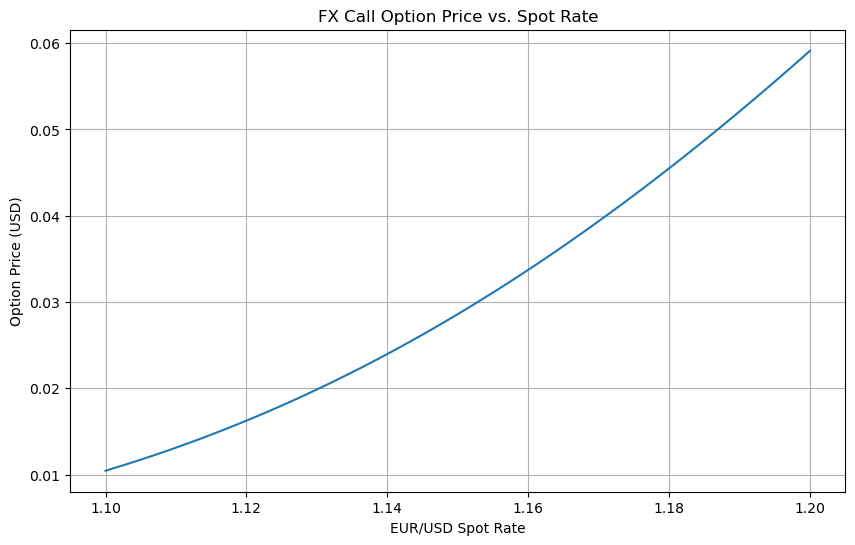

In [56]:
# ### 3. Sensitivity Analysis
# Price vs. Spot Rate

import matplotlib.pyplot as plt

spots = np.linspace(1.10, 1.20, 50)
prices = [garman_kohlhagen(s, K, T, rd, rf, sigma, 'call') for s in spots]

plt.figure(figsize=(10,6))
plt.plot(spots, prices)
plt.title("FX Call Option Price vs. Spot Rate")
plt.xlabel("EUR/USD Spot Rate")
plt.ylabel("Option Price (USD)")
plt.grid(True)
plt.show()

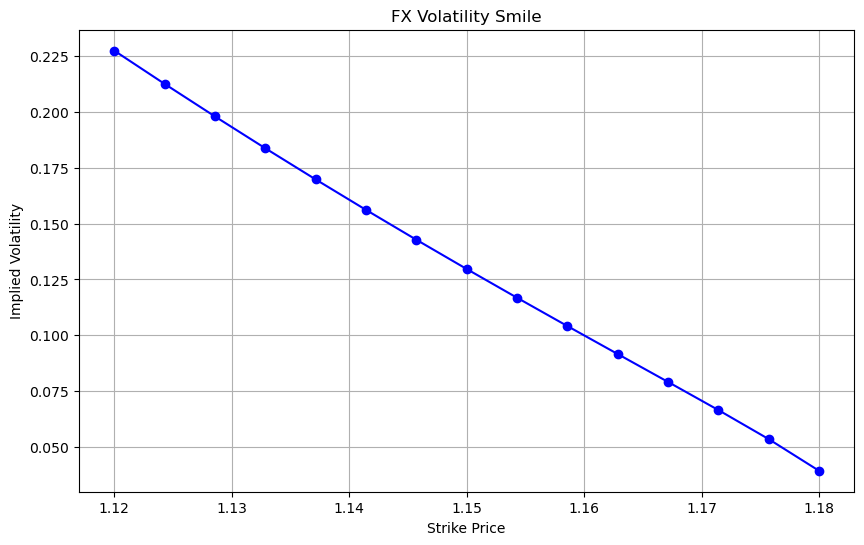

In [57]:
# ### 4. Volatility Smile Analysis
strikes = np.linspace(1.12, 1.18, 15)
implied_vols = []

for strike in strikes:
    # Assume market price follows Garman-Kohlhagen with 10% volatility
    price = garman_kohlhagen(S, strike, T, rd, rf, 0.10, 'call')
    # Calculate implied volatility
    iv = implied_volatility(price, S, strike, T, rd, rf)
    implied_vols.append(iv)

plt.figure(figsize=(10,6))
plt.plot(strikes, implied_vols, 'bo-')
plt.title("FX Volatility Smile")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.grid(True)
plt.show()

In [58]:
# FX Options Analysis Notebook
# **Scenario:** Analyze EUR/USD options for a US investor


# Basic Option Pricing
# Using `garman_kohlhagen` for valuation

import numpy as np
import matplotlib.pyplot as plt
from assetpricing.foreign_exchange.fx_options import (
    garman_kohlhagen,
    fx_delta,
    fx_gamma,
    fx_vega,
    fx_theta,
    fx_rho,
    fx_phi,
    implied_volatility,
    price_sensitivity,
    volatility_smile
)

# Market parameters
params = {
    'S': 1.1500,    # Spot EUR/USD
    'T': 0.5,       # 6 months
    'rd': 0.025,    # USD rate (domestic)
    'rf': 0.015,    # EUR rate (foreign)
    'sigma': 0.095  # Volatility
}


In [59]:
# Calculate ATM option prices
atm_call = garman_kohlhagen(**params, K=1.1500, option_type='call')
atm_put = garman_kohlhagen(**params, K=1.1500, option_type='put')

print(f"ATM Call Price: {atm_call:.4f}")
print(f"ATM Put Price: {atm_put:.4f}")

# Greeks Calculation
# Using risk sensitivity functions
# Calculate Greeks for ATM call
greeks = {
    'Delta': fx_delta(**params, K=1.1500, option_type='call'),
    'Gamma': fx_gamma(**params, K=1.1500),
    'Vega': fx_vega(**params, K=1.1500),
    'Theta': fx_theta(**params, K=1.1500, option_type='call'),
    'Rho': fx_rho(**params, K=1.1500, option_type='call'),
    'Phi': fx_phi(**params, K=1.1500, option_type='call')
}

print("\nATM Call Greeks:")
for greek, value in greeks.items():
    print(f"{greek + ':':<6} {value:.6f}")




ATM Call Price: 0.0334
ATM Put Price: 0.0277

ATM Call Greeks:
Delta: 0.538953
Gamma: 5.095803
Vega:  0.320112
Theta: -0.025049
Rho:   0.293179
Phi:   -0.309898


### FX Forward Pricing

In [60]:
forward_rate = fx_forward_rate(
    spot_rate=1.25,      # Current FX rate (USD/EUR)
    domestic_rate=0.05,  # USD interest rate
    foreign_rate=0.03,   # EUR interest rate
    T=0.5,               # Time to delivery (years)
    continuous=True      # Continuous compounding
)
print(f"6M Forward Rate: {forward_rate:.4f} USD/EUR")

6M Forward Rate: 1.2626 USD/EUR


In [61]:
# Sensitivity Analysis
# Using `price_sensitivity` function

# Spot rate sensitivity

# Now call with parameter='spot'
call_prices = price_sensitivity(param_range=spots, parameter='spot', K=1.1600, **params)

In [ ]:
# Sensitivity plot for spot rates
spots = np.linspace(1.10, 1.20, 50)
plot_sensitivity(spots, 'spot', K=1.16, T=0.25, rd=0.03, rf=0.01, sigma=0.15, S=1.15)

# Volatility surface plot
T_values = np.linspace(0.1, 2.0, 20)
sigma_range = np.linspace(0.1, 0.4, 20)
plot_volatility_surface(S=1.15, K=1.16, T_values=T_values, rd=0.03, rf=0.01, sigma_range=sigma_range)

NameError: name 'plot_sensitivity' is not defined

In [55]:
# Volatility Analysis
# Using `implied_volatility` and `volatility_smile`

# Generate mock market data
strikes = np.linspace(1.12, 1.18, 15)
market_prices = [garman_kohlhagen(S=1.15, K=k, T=0.5, rd=0.025, rf=0.015, 
                                 sigma=0.1 + 0.02*(k-1.15)) for k in strikes]

# Calculate smile
smile = volatility_smile(strikes=strikes, prices=market_prices, **params)

# Plot results
plt.figure(figsize=(10,6))
plt.plot(strikes, list(smile.values()), 'bo-')
plt.title("Volatility Smile Analysis (volatility_smile)")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.grid(True)
plt.show()

TypeError: volatility_smile() got an unexpected keyword argument 'sigma'

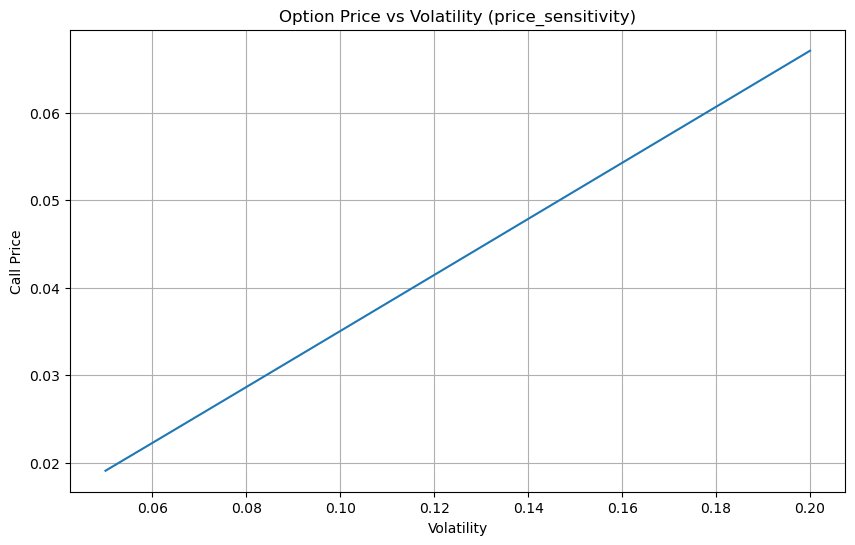

In [56]:
# Advanced Sensitivity: Vega Profile
# Using `price_sensitivity` with volatility parameter

vols = np.linspace(0.05, 0.20, 50)
vega_sensitivity = price_sensitivity(param_range=vols, parameter='sigma', K=1.1500, **params)

plt.figure(figsize=(10,6))
plt.plot(vols, vega_sensitivity)
plt.title("Option Price vs Volatility (price_sensitivity)")
plt.xlabel("Volatility")
plt.ylabel("Call Price")
plt.grid(True)
plt.show()

# Utilities

In [20]:
dc_act360 = day_count(
    start_date="2023-01-01",
    end_date="2023-07-01",
    convention='ACT/360'
)
print(f"ACT/360 Day Count: {dc_act360:.4f}")

ACT/360 Day Count: 0.5028


# Credit Risk

In [22]:
term_structure = {
    1: 0.952,  # Year 1 discount factor
    2: 0.907,  # Year 2 discount factor
    3: 0.864,
    4: 0.823,
    5: 0.785
}

cds = CreditDefaultSwap(
    notional=10_000_000,
    spread=0.02,
    recovery_rate=0.40,
    term_structure=term_structure  # Use dictionary directly
)

# Now calculations will work
hr = 0.03
print(f"Premium Leg PV: ${cds.pv_premium_leg(hr):,.2f}")
print(f"Default Leg PV: ${cds.pv_default_leg(hr):,.2f}")
print(f"Fair Spread: {cds.fair_spread(hr):.4f}")

Premium Leg PV: $794,654.48
Default Leg PV: $726,024.96
Fair Spread: 6.7682
